<a href="https://colab.research.google.com/github/beatrizmontenegro07/Atividade4-CalculoNumerico/blob/main/Atividade4_CalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✏️ Implementação da Regra de Simpson Composta

In [ ]:
def regraSimpsonComposta (a, b, n, valores_x, valores_y):
  """
  Retorna o resultado da aproximação da integral após a aplicação da Regrade Simpson Composta

  Parâmetros:
  a (float): extremidade inferior do intervalo
  b (float): extremidade superior do intervalo
  n (int): partes existentes no intervalo
  valores_x (list): pontos x_i, com i = 0, 1, ..., n
  valores_y (list): pontos y_i, com i = 0, 1, ..., n

  Retorna:
  float: Valor da aproximação do cálculo de integral definida
  """
  h = (b - a) / n

  somatorio = 0
  for i, x in enumerate(valores_x):
    if x == a or x == b:
      somatorio += valores_y[i]
    elif i % 2 == 0:
      somatorio += 2 * valores_y[i]
    else:
      somatorio += 4 * valores_y[i]

  return (h / 3) * somatorio


# ✏️ Implementação da Regra dos Trapézios Generalizada

In [ ]:
def regraDosTrapeziosGeral(a, b, n, f):
  """Funcao para calcular a regra do trapezio generalizada, onde:
     a (float) = valor inicial de x
     b (float) = valor final de x
     n (int) = numero de segmentos em que a funcao sera dividida
     f (funcao) = funcao que vai gerar os valores de Yi a partir dos Xi

     Retorno:
       integral (float) = Valor aproximado da integral de f definida em a e b
  """
  h = (b - a) / n #h define o intervalo de cada Xi
  valores_x = []
  valores_y = []
  x = a #x comeca com o valor inicial a
  for i in range(0, n+1):
    y = f(x) #aplicando a funcao em x
    valores_x.append(x)
    valores_y.append(y)
    x = x + h #incrementando x para para o proximo valor do intervalo

  integral = 0 #comeca o calculo da integral

  for k in range(0, n+1):
    fx = valores_y[k] #valor de f(x) nessa iteracao
    if(k == 0) or (k == n):
      integral = integral + (1 * fx)
    else:
      integral = integral + (2 * fx)

  integral = integral * (h/2) #ultimo passo da formula
  return integral


# ✏️ Implementação do método de Gauss-Seidel

In [ ]:
def gauss_seidel(coeficientes, constantes, x_inicial, tolerancia, max_iteracoes):
    """
    Método de Gauss-Seidel para resolver sistemas lineares.

    Parâmetros:
    coeficientes (list of list of floats): Matriz dos coeficientes do sistema.
    constantes (list of floats): Vetor das constantes (lado direito das equações).
    x_inicial (list of floats): Aproximação inicial das soluções.
    tolerancia (float): Critério de parada.
    max_iteracoes (int): Número máximo de iterações.

    Retorna:
    tuple: Solução aproximada do sistema e número de iterações.
    """
    n = len(constantes)
    x = x_inicial.copy()

    for k in range(max_iteracoes):
        x_novo = x.copy()
        for i in range(n):
            soma = sum(coeficientes[i][j] * x_novo[j] for j in range(n) if j != i)
            x_novo[i] = (constantes[i] - soma) / coeficientes[i][i]

        if all(abs(x_novo[i] - x[i]) < tolerancia for i in range(n)):
            return x_novo, k + 1  # Retorna a solução e o número de iterações

        x = x_novo

    return x, max_iteracoes  # Retorna o valor após o número máximo de iterações


# 📑Questão 1

 Um radar foi usado para medir a velocidade de um corredor durante os
primeiros 5 segundos de uma corrida (Veja a tabela). Use a regra de
Simpson composta para estimar a distância que o corredor cobriu durante
aqueles 5 segundos.

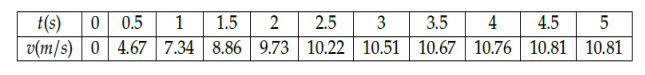

In [ ]:
valores_t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  #valores do tempo
valores_v = [0, 4.67, 7.34, 8.86, 9.73, 10.22, 10.51, 10.67, 10.76, 10.81, 10.81]   #valores da velocidade
a = 0  #extremidade inferior do intervalo
b = 5  #extremidade superior do intervalo
n = 10 #quantidade de partições do intervalo

#Resultado da distancia calculada
distancia = regraSimpsonComposta(a, b, n, valores_t, valores_v)

print(f"Distância aproximada pecorrida é {distancia} metros")

Distância aproximada pecorrida é 44.735 metros


# 📑 Questão 2


Suponha que você seja um engenheiro civil e precise calcular a área sob
uma curva que descreve a variação da pressão ao longo de uma parede de
barragem. Usando a Regra dos Trapézios Generalizada, estime essa área
considerando que a pressão $(P)$ varia com a profundidade $(h)$ segundo a
função $P(h) = 5h² + 3h + 2$ entre 0 e 10 metros de profundidade. Divida o intervalo em 5 segmentos
iguais e aplique a regra para estimar a pressão total sobre a parede.

**Resposta:** Para podermos aplicar a função de regraDosTrapeziosGeral nessa situação, vamos criar uma função em Python que possa nos fornecer o valor de $P(h)$ a cada $h$ dado como parâmetro.


In [ ]:
#Criando a funcao que sera usada no metodo

def f2(x):
  #f2(x) eh a funcao P(h)
  #onde x eh o valor da profundidade h
  #retorna o valor y correspondente a P(h)

  y = (5 * x**2) + (3 * x) + 2
  return y

Agora com a função $P(h)$ implementada, basta chamar a regraDosTrapeziosGeral com os valores fornecidos pelo enunciado.

In [ ]:
#Aplicando a regra dos trapezios com P(h)

a = 0 #profundidade inicial
b = 10 #limite de profundidade
n = 5 #numero de segmentos que o intervalo sera dividido
resultado = regraDosTrapeziosGeral(a, b, n, f2)

print(f"A pressao total foi de: {resultado:.4f}")

A pressao total foi de: 1870.0000


# 📑 Questão 3

Trabalhando na otimização da distribuição de energia elétrica, você
enfrenta um sistema de equações que representa o balanceamento de carga
em diferentes nós de uma rede. O sistema é:  
$$
\begin{cases}
3x_1 - x_2 + x_3 = 1 \\
3x_1 +3x_2 + 7x_3 = 4 \\
3x_1 + 6x + 2x_3 = 0
\end{cases}
$$  
Resolva pelo método de Gauss-Seidel, com e = 0,001


In [ ]:
A = [
    [3, -1, 1],    # Primeira equação
    [3, 6, 2],      # Terceira equação
    [3, 3, 7],     # Segunda equação
]

b = [1, 0, 4]
x_inicial = [0, 0, 0]
tolerancia = 0.001
max_iteracoes = 1000

# Chamada da função Gauss-Seidel
solucao, iteracoes = gauss_seidel(A, b, x_inicial, tolerancia, max_iteracoes)

# Resultados
print(f"Solução aproximada: {solucao}")
print(f"Número de iterações: {iteracoes}")

Solução aproximada: [0.0353510682848767, -0.23678862659534294, 0.6577589535616284]
Número de iterações: 6


# 📑 Questão 4

Um engenheiro de Produção supervisiona a produção de quatro tipos de
computadores. Existem quatro espécies de recursos necessários à produção:
mão-de-obra, metais, plásticos e componentes electrónicos. As quantidades
destes recursos, necessárias para produzir cada computador são:

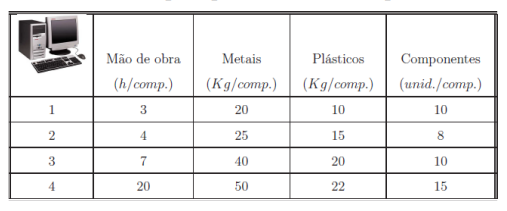  

Considere um consumo diário de 504 h de mão-de-obra, 1970 Kg de
metais, 970 Kg de plásticos e 601 componentes. Calcule o número
aproximado de computadores (número inteiro) de cada tipo produzidos por
dia. Utilize um dos métodos abordados em aulas!


In [ ]:
C = [
    [20, 7, 4, 3],     # Mão de obra
    [50, 40, 25, 20],  # Metais
    [22, 20, 15, 10],  # Pláticos
    [15, 10, 8, 10] ,   # Componentes
]

d = [504, 1970, 970, 601] # Coeficientes
x0 = [9, 10, 12, 10]
e = 0.002
max = 1000

solucao, iteracoes = gauss_seidel(C, d, x0, e, max)
print(f"Solução aproximada: {solucao}")

for i in range(len(solucao)):
  solucao[i] = round(solucao[i])

print(f"Solução em valores inteiros: {solucao}")
print(f"Número de iterações: {iteracoes}")

Solução aproximada: [15.001105401959995, 17.992411902461562, 12.010312270859732, 9.997680177910661]
Solução em valores inteiros: [15, 18, 12, 10]
Número de iterações: 29
